In [0]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from google.colab import drive  #importing file from local drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
title_basics = pd.read_csv(r'/content/drive/My Drive//title.basics.tsv.gz', sep = '\t')
title_basics.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
dataframe=title_basics[['tconst','titleType','isAdult','runtimeMinutes','genres']]
dataframe

,tconst,titleType,isAdult,runtimeMinutes,genres
0,tt0000001,short,0,1,"Documentary,Short"
1,tt0000002,short,0,5,"Animation,Short"
2,tt0000003,short,0,4,"Animation,Comedy,Romance"
3,tt0000004,short,0,12,"Animation,Short"
4,tt0000005,short,0,1,"Comedy,Short"
...,...,...,...,...,...
6796788,tt9916848,tvEpisode,0,\N,"Action,Drama,Family"
6796789,tt9916850,tvEpisode,0,\N,"Action,Drama,Family"
6796790,tt9916852,tvEpisode,0,\N,"Action,Drama,Family"
6796791,tt9916856,short,0,27,Short


In [5]:
ratings_title = pd.read_csv(r'https://datasets.imdbws.com/title.ratings.tsv.gz', sep = '\t') #to get a relation of nconst and tconst
ratings_title.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1613
1,tt0000002,6.0,198
2,tt0000003,6.5,1293
3,tt0000004,6.1,121
4,tt0000005,6.1,2068


In [6]:
dataframe=dataframe.merge(ratings_title,on='tconst')
dataframe

,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1,"Documentary,Short",5.6,1613
1,tt0000002,short,0,5,"Animation,Short",6.0,198
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.5,1293
3,tt0000004,short,0,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1,"Comedy,Short",6.1,2068
...,...,...,...,...,...,...,...
1040723,tt9916576,tvEpisode,0,85,Reality-TV,6.0,9
1040724,tt9916578,tvEpisode,0,\N,"Adventure,Biography,Comedy",8.5,18
1040725,tt9916720,short,0,10,"Comedy,Horror,Mystery",5.7,51
1040726,tt9916766,tvEpisode,0,43,"Family,Reality-TV",6.8,13


In [7]:
dataframe = dataframe.replace('\\N', np.nan)
dataframe

,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1,"Documentary,Short",5.6,1613
1,tt0000002,short,0,5,"Animation,Short",6.0,198
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.5,1293
3,tt0000004,short,0,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1,"Comedy,Short",6.1,2068
...,...,...,...,...,...,...,...
1040723,tt9916576,tvEpisode,0,85,Reality-TV,6.0,9
1040724,tt9916578,tvEpisode,0,NaN,"Adventure,Biography,Comedy",8.5,18
1040725,tt9916720,short,0,10,"Comedy,Horror,Mystery",5.7,51
1040726,tt9916766,tvEpisode,0,43,"Family,Reality-TV",6.8,13


In [8]:
dataframe = dataframe.dropna()
dataframe

,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1,"Documentary,Short",5.6,1613
1,tt0000002,short,0,5,"Animation,Short",6.0,198
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.5,1293
3,tt0000004,short,0,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1,"Comedy,Short",6.1,2068
...,...,...,...,...,...,...,...
1040721,tt9916538,movie,0,123,Drama,8.4,5
1040722,tt9916544,short,0,12,"Drama,Short",7.2,19
1040723,tt9916576,tvEpisode,0,85,Reality-TV,6.0,9
1040725,tt9916720,short,0,10,"Comedy,Horror,Mystery",5.7,51


In [9]:
#consider only those that have votes greater than 49
dataframe = dataframe[dataframe['numVotes']>=50]
dataframe

,tconst,titleType,isAdult,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,0,1,"Documentary,Short",5.6,1613
1,tt0000002,short,0,5,"Animation,Short",6.0,198
2,tt0000003,short,0,4,"Animation,Comedy,Romance",6.5,1293
3,tt0000004,short,0,12,"Animation,Short",6.1,121
4,tt0000005,short,0,1,"Comedy,Short",6.1,2068
...,...,...,...,...,...,...,...
1040678,tt9914942,movie,0,74,Drama,6.8,79
1040712,tt9916200,tvEpisode,0,43,Drama,8.4,153
1040713,tt9916204,tvEpisode,0,42,Drama,8.2,177
1040718,tt9916380,tvSeries,0,43,"Adventure,Comedy,Family",9.1,101


In [10]:
type_rating=dataframe[['titleType','averageRating']]
type_rating

,titleType,averageRating
0,short,5.6
1,short,6.0
2,short,6.5
3,short,6.1
4,short,6.1
...,...,...
1040678,movie,6.8
1040712,tvEpisode,8.4
1040713,tvEpisode,8.2
1040718,tvSeries,9.1


In [11]:
type_rating=type_rating.groupby(by='titleType',as_index=False).mean()
type_rating

,titleType,averageRating
0,movie,6.035517
1,short,6.522755
2,tvEpisode,7.776988
3,tvMiniSeries,7.313422
4,tvMovie,6.282956
5,tvSeries,6.944537
6,tvShort,7.027545
7,tvSpecial,7.062166
8,video,6.242963
9,videoGame,6.565000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

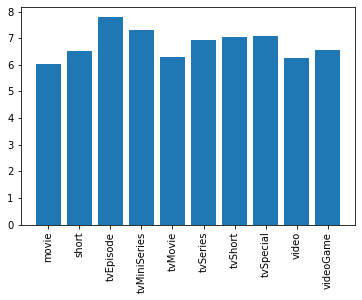

In [12]:
plt.bar(type_rating.titleType,type_rating.averageRating)
plt.xticks(rotation=90)

In [13]:
adult_rating=dataframe[['isAdult','averageRating']]
adult_rating

,isAdult,averageRating
0,0,5.6
1,0,6.0
2,0,6.5
3,0,6.1
4,0,6.1
...,...,...
1040678,0,6.8
1040712,0,8.4
1040713,0,8.2
1040718,0,9.1


In [14]:
adult_rating=adult_rating.groupby(by='isAdult',as_index=False).mean()
adult_rating

,isAdult,averageRating
0,0,6.820661
1,1,6.108047


In [0]:
adult_rating=adult_rating.astype({'isAdult':'category'})

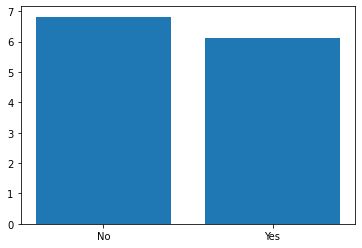

In [16]:
plt.bar(adult_rating.isAdult,adult_rating.averageRating,tick_label=['No','Yes'])
plt.xticks()
plt.show()

In [17]:
time_rating=dataframe[['runtimeMinutes','averageRating']]
time_rating=time_rating.groupby(by='runtimeMinutes',as_index=False).mean()
time_rating

,runtimeMinutes,averageRating
0,0,5.350000
1,1,5.533454
2,10,6.807592
3,100,6.119135
4,101,6.121573
...,...,...
565,960,8.250000
566,97,5.959802
567,98,5.993675
568,99,6.076363


In [18]:
time_rating=time_rating.astype({'runtimeMinutes':'int64'})
time_rating.dtypes

runtimeMinutes      int64
averageRating     float64
dtype: object

In [0]:
time_rating=time_rating.sort_values(by='runtimeMinutes',inplace=False,ignore_index=True)

In [20]:
time_rating=time_rating[time_rating['runtimeMinutes'].between(10,300)]
time_rating

,runtimeMinutes,averageRating
10,10,6.807592
11,11,7.122149
12,12,6.893761
13,13,6.845811
14,14,6.746759
...,...,...
296,296,7.850000
297,297,8.250000
298,298,8.450000
299,299,6.950000


Text(0.5, 0, 'Runtime in minutes')

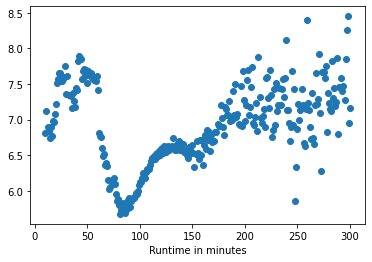

In [21]:
plt.scatter(time_rating.runtimeMinutes,time_rating.averageRating)
plt.xlabel('Runtime in minutes')

In [22]:
genre_rating=dataframe[['genres','averageRating']]
genre_rating

,genres,averageRating
0,"Documentary,Short",5.6
1,"Animation,Short",6.0
2,"Animation,Comedy,Romance",6.5
3,"Animation,Short",6.1
4,"Comedy,Short",6.1
...,...,...
1040678,Drama,6.8
1040712,Drama,8.4
1040713,Drama,8.2
1040718,"Adventure,Comedy,Family",9.1


In [23]:
b = pd.DataFrame(genre_rating.genres.str.split(',').tolist(), index=genre_rating.averageRating).stack()
b = b.reset_index()[['averageRating',0]]
b.columns = [ 'averageRating', 'genres']
genre_rating = b
genre_rating

,averageRating,genres
0,5.6,Documentary
1,5.6,Short
2,6.0,Animation
3,6.0,Short
4,6.5,Animation
...,...,...
638949,9.1,Comedy
638950,9.1,Family
638951,5.7,Comedy
638952,5.7,Horror


In [0]:
del b

In [25]:
genre_rating=genre_rating.groupby(by='genres',as_index=False).mean()
genre_rating=genre_rating.sort_values(by='averageRating',inplace=False,ignore_index=True)
genre_rating

,genres,averageRating
0,Horror,5.555580
1,Thriller,6.001893
2,Adult,6.179066
3,Sci-Fi,6.419098
4,Musical,6.522820
5,Short,6.573111
6,Film-Noir,6.644715
7,Romance,6.750381
8,Comedy,6.857167
9,Western,6.902619


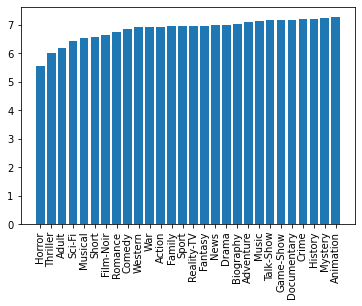

In [26]:
plt.bar(genre_rating.genres,genre_rating.averageRating)
plt.xticks(rotation=90)
plt.show()